In [2]:
import pandas as pd
import numpy as np
import os
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ruta_df =  os.path.join("..","..","..", "data", "processed","df_dif.parquet")
df = pd.read_parquet(ruta_df)
df

,DATE,Peleador_A,Peleador_B,WINNER,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF,...,Record_DIFF,Peleas_DIFF,Puntos_DIFF,Racha_DIFF,Victorias_KO_DIFF,Victorias_Sub_DIFF,Victorias_Decision_DIFF,Derrotas_KO_DIFF,Derrotas_Sub_DIFF,Derrotas_Decision_DIFF
0,2000-06-09,Kevin Randleman,Pedro Rizzo,False,-0.60,-0.0768,0.650000,0.72,0.00,378.72,...,-3.0,0,-3.993854,-2,-0.96,0.00,0.36,0.00,0.00,0.60
1,2000-09-22,Jeremy Horn,Eugene Jackson,False,-0.64,0.1836,0.315789,0.80,0.00,-2.24,...,73.0,0,10.209869,3,-1.00,1.36,0.00,0.00,-0.36,0.00
2,2001-02-23,Tito Ortiz,Evan Tanner,False,0.24,-0.2368,0.221893,-1.12,0.00,600.96,...,-17.0,2,1.292233,-1,1.04,-0.64,0.60,1.00,0.00,0.00
3,2001-05-04,Chuck Liddell,Kevin Randleman,False,0.00,0.0552,-0.508475,-1.64,0.40,-601.12,...,1.0,-2,4.775365,2,0.60,0.00,-2.24,-0.36,1.00,-1.00
4,2001-06-29,Pat Miletich,Shonie Carter,False,-0.72,-0.0608,0.022094,0.88,-1.12,-122.28,...,-33.0,2,-10.171224,-3,0.64,1.60,-0.60,0.00,0.36,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3508,2025-04-05,Manuel Torres,Drew Dober,False,0.00,0.1544,0.242133,0.24,0.00,-20.40,...,-3.0,-20,84.052337,0,-7.00,-0.40,-3.00,-1.00,-4.00,-3.60
3509,2025-04-12,Loma Lookboonmee,Istela Nunes,False,-0.24,0.1976,0.549550,0.24,0.40,193.24,...,3.0,4,136.868902,3,0.00,0.60,4.36,-0.96,-1.00,1.00
3510,2025-04-12,Josh Emmett,Lerone Murphy,True,-0.04,-0.2400,-0.365385,-0.80,0.00,-236.68,...,2.0,6,-176.531311,-7,1.36,0.00,1.04,1.00,1.00,1.60
3511,2025-04-12,Pat Sabatini,Joanderson Brito,False,0.00,0.2212,-0.048376,-0.36,0.00,-25.60,...,-1.0,1,-192.276697,1,-2.60,0.36,3.00,1.60,0.00,-1.36


In [5]:
df["DATE"] = pd.to_datetime(df["DATE"])

# Filtra los combates después del 16 de febrero de 2025
df_antiguos = df[df["DATE"] <= "2025-02-16"]
df_antiguos = df_antiguos[df_antiguos["DATE"] >= "2010-01-01"]
df_nuevos = df[df["DATE"] > "2025-02-16"]
df_nuevos

,DATE,Peleador_A,Peleador_B,WINNER,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF,...,Record_DIFF,Peleas_DIFF,Puntos_DIFF,Racha_DIFF,Victorias_KO_DIFF,Victorias_Sub_DIFF,Victorias_Decision_DIFF,Derrotas_KO_DIFF,Derrotas_Sub_DIFF,Derrotas_Decision_DIFF
3476,2025-03-01,Andre Fili,Melquizael Costa,True,0.40,-0.0464,-0.182708,-1.12,-0.36,-109.04,...,2.0,19,-1.147212e-07,0,4.00,-0.36,6.36,2.00,1.00,5.00
3477,2025-03-01,Brendan Allen,Anthony Hernandez,True,0.00,-0.0240,-0.017913,-1.28,0.00,-159.76,...,9.0,6,9.645258e+01,-6,-0.36,3.40,2.60,1.00,-1.00,0.36
3478,2025-03-01,Jean Silva,Melsik Baghdasaryan,False,0.88,0.0012,0.285714,0.00,0.00,-13.76,...,4.0,-1,2.153260e+02,2,0.96,0.00,-1.36,0.00,-0.60,0.00
3479,2025-03-01,Ricky Simon,Javid Basharat,False,0.00,-0.1476,-0.095434,0.00,0.00,-59.80,...,0.0,8,1.666214e+01,0,1.00,3.00,1.00,2.00,0.00,1.60
3480,2025-03-01,Henry Cejudo,Song Yadong,True,-0.40,0.0452,0.016316,0.00,0.00,-81.40,...,1.0,0,-5.465342e-01,0,-1.00,-1.00,1.40,0.00,0.00,0.60
3481,2025-03-08,Nasrat Haqparast,Esteban Ribovics,False,0.24,-0.0068,-0.444444,0.00,0.00,-19.32,...,-3.0,9,3.301000e+01,1,1.00,0.00,5.00,1.00,0.00,2.00
3482,2025-03-08,Manel Kape,Asu Almabayev,False,0.40,0.0448,-0.229782,-0.96,-0.24,-487.76,...,-8.0,4,-1.109037e+02,-3,2.36,-1.00,0.04,0.00,0.00,2.60
3483,2025-03-08,Cody Brundage,Julian Marquez,False,0.00,-0.0336,0.227273,0.00,0.00,35.80,...,-2.0,3,9.656570e+00,1,2.00,-2.00,0.00,-0.96,1.60,1.00
3484,2025-03-08,Andrea Lee,JJ Aldrich,True,0.00,-0.1580,0.196721,0.24,0.32,-184.76,...,5.0,-2,-9.909213e+01,0,0.00,1.00,-4.60,-1.00,-1.00,3.60
3485,2025-03-08,Ricardo Ramos,Chepe Mariscal,True,0.00,-0.3796,0.082192,0.76,-0.96,-144.96,...,2.0,9,-1.852969e+02,-3,1.00,1.00,2.40,2.00,1.60,1.00


In [6]:
X_train = df_antiguos.drop(columns=["WINNER", "DATE","Peleador_A","Peleador_B"])
y_train = df_antiguos["WINNER"]
X_test = df_nuevos.drop(columns=["WINNER", "DATE","Peleador_A","Peleador_B"])
y_test = df_nuevos["WINNER"]

In [7]:

params = {'n_estimators': 100, 'max_depth': 39, 'learning_rate': 0.013855267540212752, 'subsample': 0.7097002483532678, 'colsample_bytree': 0.9049166524337446, 'gamma': 0.3376761198544125, 'min_child_weight': 13, 'scale_pos_weight': np.float64(1.2905829596412555), 'reg_alpha': 0.5, 'tree_method': 'exact', 'grow_policy': 'lossguide'} 

xgboost_dif = XGBClassifier(**params)

xgboost_dif.fit(X_train, y_train)

y_pred_xgboost_dif = xgboost_dif.predict(X_test)

print("Reporte de clasificación xgboost_dif:")
print(classification_report(y_test, y_pred_xgboost_dif))
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgboost_dif):.4f}')
print(f"F1-score: {f1_score(y_test,y_pred_xgboost_dif)}")

Reporte de clasificación xgboost_dif:
              precision    recall  f1-score   support

       False       0.78      0.61      0.68        23
        True       0.53      0.71      0.61        14

    accuracy                           0.65        37
   macro avg       0.65      0.66      0.64        37
weighted avg       0.68      0.65      0.65        37

Accuracy: 0.6486
F1-score: 0.6060606060606061


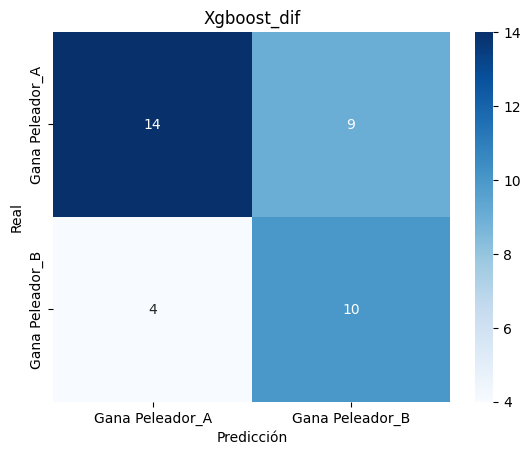

In [8]:
cm = confusion_matrix(y_test, y_pred_xgboost_dif)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Gana Peleador_A', 'Gana Peleador_B'], yticklabels=['Gana Peleador_A', 'Gana Peleador_B'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Xgboost_dif')
plt.show()

In [9]:
y_pred_probs = xgboost_dif.predict_proba(X_test)
df_nuevos = df_nuevos.reset_index(drop=True)
# Creamos el DataFrame con los datos
df_resultados = pd.DataFrame({
    'Peleador A': df_nuevos['Peleador_A'].values,
    'Peleador B': df_nuevos['Peleador_B'].values,
    'Ganador': y_test.values,
    'Predicción': y_pred_xgboost_dif,
    'Probabilidad A': y_pred_probs[:, 0],  # Asumiendo clase 1 es A gana
    'Probabilidad B': y_pred_probs[:, 1]   # Asumiendo clase 0 es B gana
})



# Mostrar los primeros resultados
df_resultados

,Peleador A,Peleador B,Ganador,Predicción,Probabilidad A,Probabilidad B
0,Andre Fili,Melquizael Costa,True,1,0.394639,0.605361
1,Brendan Allen,Anthony Hernandez,True,1,0.498246,0.501754
2,Jean Silva,Melsik Baghdasaryan,False,0,0.598603,0.401397
3,Ricky Simon,Javid Basharat,False,1,0.469726,0.530274
4,Henry Cejudo,Song Yadong,True,1,0.431263,0.568737
5,Nasrat Haqparast,Esteban Ribovics,False,0,0.502027,0.497973
6,Manel Kape,Asu Almabayev,False,1,0.343524,0.656476
7,Cody Brundage,Julian Marquez,False,0,0.532213,0.467787
8,Andrea Lee,JJ Aldrich,True,1,0.434388,0.565612
9,Ricardo Ramos,Chepe Mariscal,True,1,0.349400,0.650600


In [10]:
len(df_nuevos), len(df_antiguos), len(df)

(37, 3193, 3513)

In [11]:
y_test_series = pd.Series(y_test).reset_index(drop=True)
y_pred_series = pd.Series(y_pred_xgboost_dif).reset_index(drop=True)

# Crear un DataFrame con los valores reales y predichos
df_errores = pd.DataFrame({
    'Real': y_test_series,
    'Predicho': y_pred_series
})

# Filtrar los errores
errores = df_errores[df_errores['Real'] != df_errores['Predicho']]

# Mostrarlos
print("Predicciones fallidas:")
print(errores)

Predicciones fallidas:
     Real  Predicho
3   False         1
6   False         1
11  False         1
14   True         0
15   True         0
16  False         1
18  False         1
19  False         1
22   True         0
24  False         1
31   True         0
35  False         1
36  False         1


In [12]:
df_nuevos = df_nuevos.reset_index(drop=True)

# Unir con las predicciones fallidas
errores_completos = df_nuevos.loc[errores.index]
errores_completos['Real'] = errores['Real']
errores_completos['Predicho'] = errores['Predicho']

print("Detalles de los errores:")
print(errores_completos)

Detalles de los errores:
         DATE           Peleador_A                 Peleador_B  WINNER  \
3  2025-03-01          Ricky Simon             Javid Basharat   False   
6  2025-03-08           Manel Kape              Asu Almabayev   False   
11 2025-03-15         Amanda Lemos             Iasmin Lucindo   False   
14 2025-03-15         Alex Pereira           Magomed Ankalaev    True   
15 2025-03-22        Josiane Nunes         Priscila Cachoeira    True   
16 2025-03-22    Da'Mon Blackshear                Cody Gibson   False   
18 2025-03-22  Alexander Hernandez             Kurt Holobaugh   False   
19 2025-03-22       Chidi Njokuani  Elizeu Zaleski dos Santos   False   
22 2025-03-29        Gunnar Nelson              Kevin Holland    True   
24 2025-03-29        Marcin Tybura                Mick Parkin   False   
31 2025-04-05  Christian Rodriguez           Melquizael Costa    True   
35 2025-04-12         Pat Sabatini           Joanderson Brito   False   
36 2025-04-12         Brad

In [13]:
# Crear un DataFrame para las importancias de las características
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgboost_dif.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                    Feature  Importance
20               Racha_DIFF    0.071938
19              Puntos_DIFF    0.055058
26   Derrotas_Decision_DIFF    0.046717
18              Peleas_DIFF    0.041512
24         Derrotas_KO_DIFF    0.038018
14        STR_GROUND_A_DIFF    0.037131
5                 CTRL_DIFF    0.037055
4                  REV_DIFF    0.037022
7          TOTAL_STR_A_DIFF    0.036807
8                 TD_A_DIFF    0.035421
16            GRAPPLER_DIFF    0.034716
21        Victorias_KO_DIFF    0.034697
15             STRIKER_DIFF    0.034652
11           STR_LEG_A_DIFF    0.034622
2                   TD_DIFF    0.034174
10          STR_BODY_A_DIFF    0.034119
23  Victorias_Decision_DIFF    0.034034
9           STR_HEAD_A_DIFF    0.033817
25        Derrotas_Sub_DIFF    0.033620
13        STR_CLINCH_A_DIFF    0.033417
1              SIG_STR_DIFF    0.033019
17              Record_DIFF    0.032636
3              SUB_ATT_DIFF    0.032509
6              TD_PORC_DIFF    0.031800


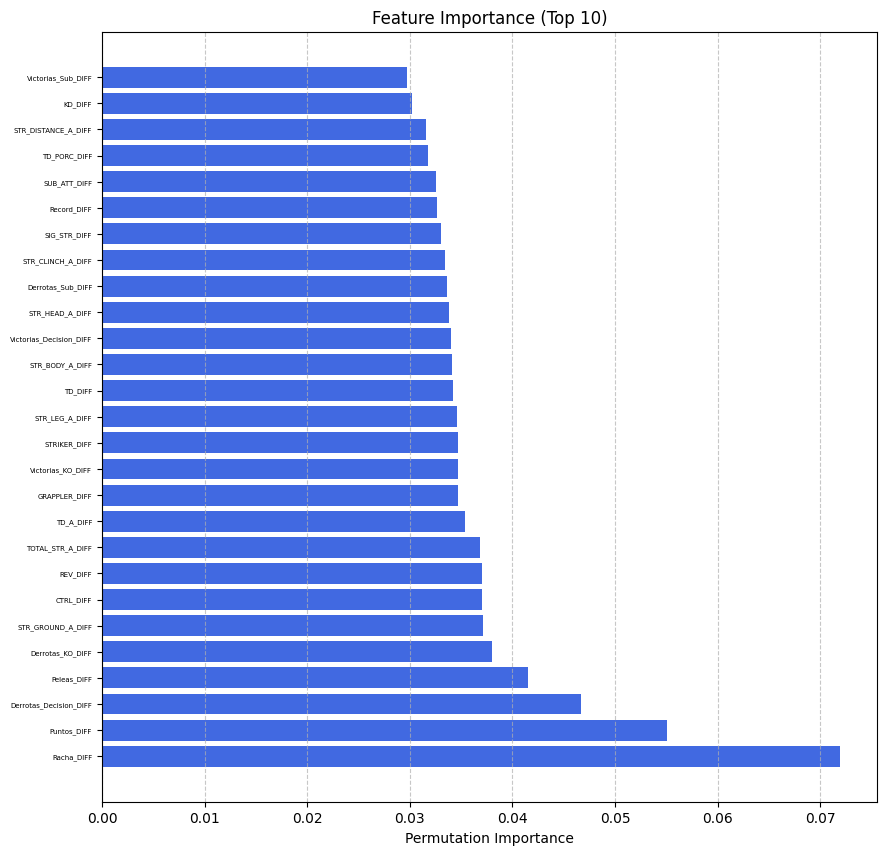

In [14]:
plt.figure(figsize=(10, 10))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="royalblue")
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Top 10)")
plt.yticks(fontsize=5)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()